In [2]:
import os
from utils.realsense import start_realsense
import pandas as pd
from watchfiles import watch
import numpy as np
import shutil
from glob import glob
from time import time
import json
import matplotlib.pyplot as plt
from analysis.analysis_h2o2 import wellsegment_h2o2, plot_titration

(512, 512, 3)
(512, 512)
col list modified : [8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8]


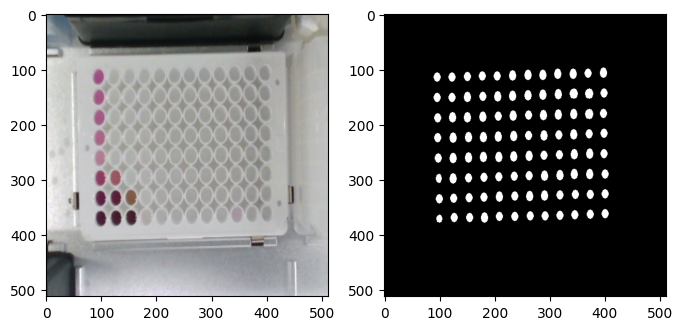

In [3]:
mask_path = r'C:\Users\scrc112\Desktop\work\yuan\protcol_h2o2_test\mask'
cls = wellsegment_h2o2(mask_path, 'blancplate_3.png' ,None, squeeze_fac= 0.4, col_list = [8]*12, path = mask_path)
cls.extract() # save pickle file of sorted mask
wellsegment_h2o2.visualize(cls.image, cls.mask)

In [9]:
prest_path = r'C:\Users\scrc112\Desktop\work\yuan\251123\preestimation'

path_smb = r'C:\Users\scrc112\Desktop\work\biplab\OpenTron\DriveSMB'
with open(os.path.join(path_smb,'ot2_transfer_config_h2o2.json'),'r') as f:
                        data = json.load(f)
            
tcdict = data['transfer_3']['locs']

cls2 = wellsegment_h2o2.load_pkl(prest_path,'preestimation_3.png',os.path.join(mask_path, 'mask.pkl'))
cls2.analyze_prestimation(tcdict)

dict_keys(['A1', 'B1', 'C1', 'D1', 'E1', 'F1', 'G1', 'H1', 'A2', 'B2', 'C2', 'D2', 'E2', 'F2', 'G2', 'H2', 'A3', 'B3', 'C3', 'D3', 'E3', 'F3', 'G3', 'H3', 'A4', 'B4', 'C4', 'D4', 'E4', 'F4', 'G4', 'H4', 'A5', 'B5', 'C5', 'D5', 'E5', 'F5', 'G5', 'H5', 'A6', 'B6', 'C6', 'D6', 'E6', 'F6', 'G6', 'H6', 'A7', 'B7', 'C7', 'D7', 'E7', 'F7', 'G7', 'H7', 'A8', 'B8', 'C8', 'D8', 'E8', 'F8', 'G8', 'H8', 'A9', 'B9', 'C9', 'D9', 'E9', 'F9', 'G9', 'H9', 'A10', 'B10', 'C10', 'D10', 'E10', 'F10', 'G10', 'H10', 'A11', 'B11', 'C11', 'D11', 'E11', 'F11', 'G11', 'H11', 'A12', 'B12', 'C12', 'D12', 'E12', 'F12', 'G12', 'H12'])
23.64043592973189
10.37956209332531


In [10]:
#cls2.analyze_prestimation(tcdict)
cls2.save_to_smb_()

In [18]:
path = r'C:\Users\scrc112\Desktop\work\yuan\TestImaging\mask'
pattern = 'blancplate'
lst = glob(os.path.join(path,pattern+'*.png'))
for idx,file in enumerate(lst):
    if file.split('\\')[-1] == pattern+'_3.png' : 
        continue
    os.remove(file)
    

In [14]:
lst

['C:\\Users\\scrc112\\Desktop\\work\\yuan\\TestImaging\\mask\\blancplate_3.png',
 'C:\\Users\\scrc112\\Desktop\\work\\yuan\\TestImaging\\mask\\blancplate_4.png']

In [17]:
file.split('\\')[-1]

'blancplate_4.png'